# Prestazioni

Sono state fatte due analisi

- Prestazioni al variare del numero di individui generati.
- Prestazioni al variare del numero di feature che compongono i dati.


In [4]:
import pandas as pd

ppga_df = pd.read_csv("../results/performance/ppga_MLPClassifier_pop_final.csv")
ppga_df = (
    ppga_df.groupby(by=["classifier", "population_size", "workers"])
    .mean()[["time", "time_std", "ptime", "ptime_std"]]
    .reset_index()
)

ppga_df

,classifier,population_size,workers,time,time_std,ptime,ptime_std
0,MLPClassifier,1000,1,4.684132,0.054007,2.205824,0.026015
1,MLPClassifier,1000,2,1.987032,0.089149,1.241450,0.022832
2,MLPClassifier,1000,4,2.476198,0.410789,1.227650,0.190301
3,MLPClassifier,1000,8,1.976199,0.276996,0.721400,0.093037
4,MLPClassifier,1000,16,3.887745,0.777388,1.002300,0.228625
5,MLPClassifier,1000,32,1.460352,0.062230,0.201700,0.003484
6,MLPClassifier,2000,1,9.493830,0.149714,4.467823,0.070007
7,MLPClassifier,2000,2,3.543293,0.096337,2.443400,0.039537
8,MLPClassifier,2000,4,7.855396,1.567309,3.845650,0.910479
9,MLPClassifier,2000,8,3.445875,0.341152,1.260050,0.115569


In [12]:
speed_up = []
for ps in ppga_df["population_size"].unique():
    mask1 = (ppga_df["population_size"] == ps) & (ppga_df["workers"] == 1)
    a1 = ppga_df[mask1]["time"].to_numpy()
    for w in ppga_df["workers"].unique():
        mask = (ppga_df["population_size"] == ps) & (ppga_df["workers"] == w)
        a = ppga_df[mask]["time"].to_numpy()
        speed_up.append(a1 / a)
        # print(speed_up[-1])

ppga_df["speed_up"] = pd.Series(speed_up)
ppga_df

,classifier,population_size,workers,time,time_std,ptime,ptime_std,speed_up
0,MLPClassifier,1000,1,4.684132,0.054007,2.205824,0.026015,[1.0]
1,MLPClassifier,1000,2,1.987032,0.089149,1.241450,0.022832,[2.3573513420494243]
2,MLPClassifier,1000,4,2.476198,0.410789,1.227650,0.190301,[1.8916628321945244]
3,MLPClassifier,1000,8,1.976199,0.276996,0.721400,0.093037,[2.370273714018603]
4,MLPClassifier,1000,16,3.887745,0.777388,1.002300,0.228625,[1.2048456667352958]
5,MLPClassifier,1000,32,1.460352,0.062230,0.201700,0.003484,[3.2075368053185613]
6,MLPClassifier,2000,1,9.493830,0.149714,4.467823,0.070007,[1.0]
7,MLPClassifier,2000,2,3.543293,0.096337,2.443400,0.039537,[2.6793803631425335]
8,MLPClassifier,2000,4,7.855396,1.567309,3.845650,0.910479,[1.2085743669805888]
9,MLPClassifier,2000,8,3.445875,0.341152,1.260050,0.115569,[2.7551293169692235]


In [13]:
speed_up = []
for ps in ppga_df["population_size"].unique():
    mask1 = (ppga_df["population_size"] == ps) & (ppga_df["workers"] == 1)
    a1 = ppga_df[mask1]["ptime"].to_numpy()
    for w in ppga_df["workers"].unique():
        mask = (ppga_df["population_size"] == ps) & (ppga_df["workers"] == w)
        a = ppga_df[mask]["ptime"].to_numpy()
        speed_up.append(a1 / a)
        # print(speed_up[-1])

ppga_df["p_speed_up"] = pd.Series(speed_up)
ppga_df

,classifier,population_size,workers,time,time_std,ptime,ptime_std,speed_up,p_speed_up
0,MLPClassifier,1000,1,4.684132,0.054007,2.205824,0.026015,[1.0],[1.0]
1,MLPClassifier,1000,2,1.987032,0.089149,1.241450,0.022832,[2.3573513420494243],[1.7768127242619542]
2,MLPClassifier,1000,4,2.476198,0.410789,1.227650,0.190301,[1.8916628321945244],[1.7967858563393497]
3,MLPClassifier,1000,8,1.976199,0.276996,0.721400,0.093037,[2.370273714018603],[3.0576991357568652]
4,MLPClassifier,1000,16,3.887745,0.777388,1.002300,0.228625,[1.2048456667352958],[2.200762403008084]
5,MLPClassifier,1000,32,1.460352,0.062230,0.201700,0.003484,[3.2075368053185613],[10.936163393827478]
6,MLPClassifier,2000,1,9.493830,0.149714,4.467823,0.070007,[1.0],[1.0]
7,MLPClassifier,2000,2,3.543293,0.096337,2.443400,0.039537,[2.6793803631425335],[1.8285269187648188]
8,MLPClassifier,2000,4,7.855396,1.567309,3.845650,0.910479,[1.2085743669805888],[1.1617860890382532]
9,MLPClassifier,2000,8,3.445875,0.341152,1.260050,0.115569,[2.7551293169692235],[3.5457503061862297]


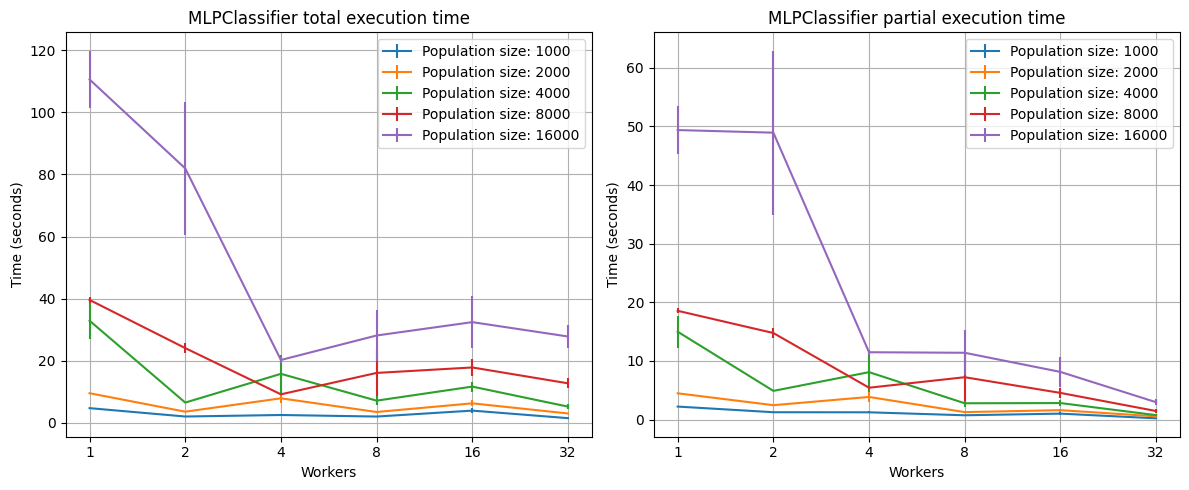

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def plot_time(df):
    models = df["classifier"].unique()
    workers = df["workers"].unique()
    population_sizes = df["population_size"].unique()

    fig, axes = plt.subplots(len(models), 2, figsize=(12, 5))

    for i, model in enumerate(models):
        for ps in population_sizes:
            mask = (df["classifier"] == model) & (df["population_size"] == ps)
            axes[i + 0].set_title(f"{model} total execution time")
            axes[i + 0].set_xlabel("Workers")
            axes[i + 0].set_ylabel("Time (seconds)")
            axes[i + 0].errorbar(
                workers,
                df[mask]["time"].values,
                df[mask]["time_std"],
                label=f"Population size: {ps}",
            )

            axes[i + 0].set_xscale("log", base=2)
            axes[i + 0].set_xticks(
                workers, labels=[int(2**w) for w in np.log2(workers)]
            )
            axes[i + 0].grid()
            axes[i + 0].legend()

            axes[i + 1].set_title(f"{model} partial execution time")
            axes[i + 1].set_xlabel("Workers")
            axes[i + 1].set_ylabel("Time (seconds)")
            axes[i + 1].errorbar(
                workers,
                df[mask]["ptime"].values,
                df[mask]["ptime_std"],
                label=f"Population size: {ps}",
            )

            axes[i + 1].set_xscale("log", base=2)
            axes[i + 1].set_xticks(
                workers, labels=[int(2**w) for w in np.log2(workers)]
            )
            axes[i + 1].grid()
            axes[i + 1].legend()

    plt.tight_layout()
    plt.show()


plot_time(ppga_df)